<div class="alert alert-block alert-success">
    <h2 style="text-align: left">Clustering Using K-Means Clustering Algorithm</h2>
</div>

**Process:**
1. read the dataset
2. preprocess the dataset
3. Standardize the dataset 
4. Select K (number of clusters)
5. Build a KMeans clustering model 

### 1. Reading the dataset
<hr style="border:1px solid orange"> </hr>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
dataset = pd.read_csv('Measuerments.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Measuerments.csv'

In [ ]:
dataset.head()

,height,weight
0,174.239573,203.552173
1,182.113367,192.210443
2,173.547440,204.673334
3,173.222420,187.045260
4,186.628395,183.353584


In [ ]:
dataset.shape

(1000, 2)

Text(0.5, 1.0, "Person's Weights Vs. Heights")

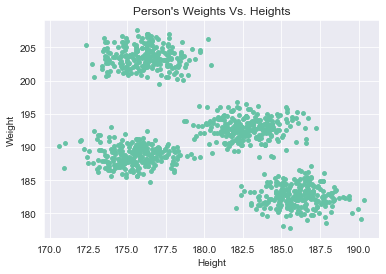

In [ ]:
plt.scatter(dataset['height'], dataset['weight'], s=15)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Person\'s Weights Vs. Heights')

### 2. Preprocessing the Dataset 
<hr style="border:1px solid orange"> </hr>

In [ ]:
dataset.isna().sum()

height    0
weight    0
dtype: int64

### 3. Standardizing the Dataset 
<hr style="border:1px solid orange"> </hr>

In [ ]:
scaler = StandardScaler()

dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled.shape

(1000, 2)

### 4. Selecting K (number of clusters)
<hr style="border:1px solid orange"> </hr>



##### 4.1 Inertia Analysis
The KMeans algorithm clusters data by trying to separate samples in $n$ groups of equal variances, minimizing a criterion known as ***inertia***, or ***within-cluster sum-of-squares Inertia***, or the ***within-cluster sum of squares criterion***, 

***Inertia*** can be recognized as a measure of how internally coherent clusters are.

The K-means algorithm aims to choose centroids that minimize the ***inertia***, or ***within-cluster sum of squared criterion***.

**Inertia Properties**

- Inertia is not a normalized metric.
- The lower values of inertia are better and zero is optimal.
- But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).
- Running a dimensionality reduction algorithm such as PCA (*more later...*) prior to k-means clustering can alleviate this problem and speed up the computations.

In [ ]:
variations = []
range_n_clusters = range(2,8)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    
    variations.append(kmeans.inertia_)

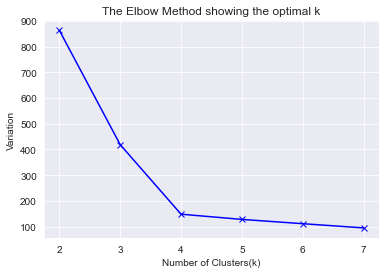

In [ ]:
plt.plot(range_n_clusters, variations, 'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Variation')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### 4.2 Silhouette Analysis

$$
    silhouette\_score = \frac{p-q}{max(p, q)}
$$


*Where:*

- **p**  is the mean distance to the points in the nearest cluster that the data point is not a part of

- **q**  is the mean intra-cluster distance to all the points in its own cluster.

    - The value of the silhouette score range lies between $-1$ to $1$.

    - A score closer to $1$ indicates that the data point is very similar to other data points in the cluster,

    - A score closer to $-1$ indicates that the data point is not similar to the data points in its cluster.

In [ ]:
# Silhouette analysis
range_n_clusters = range(2,8)

optimal_num_clusters = 0
max_silhouette_score = 0

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dataset_scaled, cluster_labels)
    
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_num_clusters=num_clusters
    
print("Optimal number of clusters = {}".format(optimal_num_clusters))
    

For n_clusters=2, the silhouette score is 0.4980648936209213
For n_clusters=3, the silhouette score is 0.6020394866575155
For n_clusters=4, the silhouette score is 0.6925946266710872
For n_clusters=5, the silhouette score is 0.6131261019380564
For n_clusters=6, the silhouette score is 0.5311393507848756
For n_clusters=7, the silhouette score is 0.46682804530521377
Optimal number of clusters = 4


### 5. Building a KMeans clustering model
<hr style="border:1px solid orange"> </hr>

In [ ]:
kmeans = KMeans(n_clusters=optimal_num_clusters, max_iter=50)
kmeans.fit(dataset_scaled)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
kmeans.labels_

array([0, 1, 0, 3, 2, 1, 1, 2, 1, 1, 0, 2, 3, 0, 2, 3, 3, 0, 1, 2, 1, 0,
       2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 0, 3, 0, 1, 0, 1, 3, 3, 1, 1, 1, 3,
       0, 1, 1, 0, 3, 1, 2, 1, 1, 3, 0, 2, 1, 1, 0, 0, 2, 2, 3, 3, 3, 0,
       1, 3, 0, 0, 0, 0, 0, 3, 1, 0, 1, 0, 3, 2, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 1, 1, 2, 3, 1, 2, 1, 3, 1, 0, 3, 2,
       1, 1, 3, 0, 3, 3, 1, 3, 2, 2, 2, 0, 3, 3, 1, 2, 1, 0, 3, 2, 2, 1,
       3, 1, 1, 1, 3, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1,
       3, 1, 1, 1, 2, 3, 0, 2, 1, 1, 1, 1, 0, 0, 1, 2, 3, 2, 2, 2, 3, 2,
       3, 2, 2, 1, 3, 1, 3, 1, 1, 3, 2, 3, 2, 0, 3, 1, 2, 2, 3, 0, 3, 0,
       3, 3, 3, 1, 0, 0, 2, 2, 3, 1, 0, 1, 0, 3, 1, 0, 3, 1, 1, 2, 2, 0,
       1, 1, 1, 0, 1, 1, 1, 3, 0, 0, 1, 3, 1, 1, 3, 2, 3, 2, 2, 3, 1, 3,
       2, 2, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3, 3, 2, 3, 1, 0, 1, 2, 0, 1, 2,
       0, 3, 1, 3, 0, 2, 2, 1, 2, 3, 0, 0, 3, 0, 3, 1, 2, 0, 3, 1, 3, 3,
       3, 1, 1, 0, 2, 3, 1, 0, 0, 2, 0, 2, 1, 0, 2,

Text(0.5, 1.0, "Person's Weights Vs. Heights")

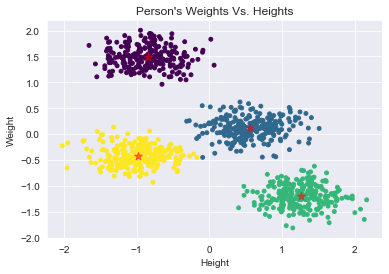

In [ ]:
centroids = kmeans.cluster_centers_
plt.scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], s=15, c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=70, alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Person\'s Weights Vs. Heights')

In [ ]:
dataset['km_clusters'] = kmeans.labels_

In [ ]:
dataset.head()

,height,weight,km_clusters
0,174.239573,203.552173,0
1,182.113367,192.210443,1
2,173.547440,204.673334,0
3,173.222420,187.045260,3
4,186.628395,183.353584,2


Text(0.5, 0.98, 'Cluster Analysis')

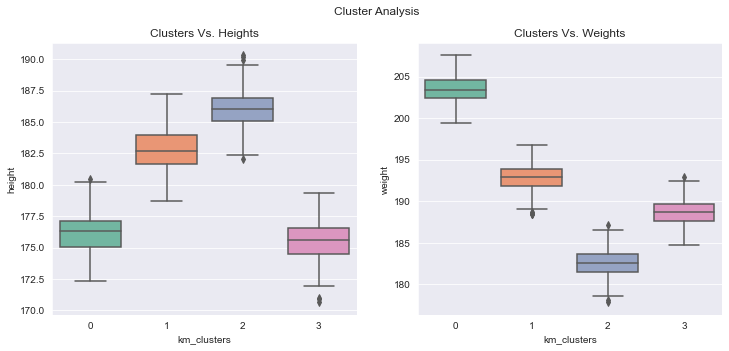

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='km_clusters', y='height', data=dataset)
plt.title('Clusters Vs. Heights')

plt.subplot(1, 2, 2)
sns.boxplot(x='km_clusters', y='weight', data=dataset)
plt.title('Clusters Vs. Weights')

plt.suptitle('Cluster Analysis')

<AxesSubplot:title={'center':'K-means Clustering Visualization'}, xlabel='height', ylabel='weight'>

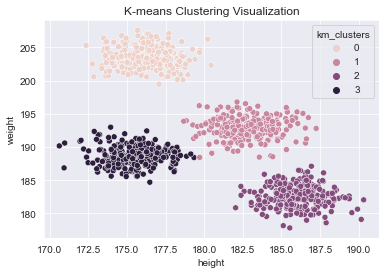

In [ ]:
plt.title('K-means Clustering Visualization')
sns.scatterplot(x="height", y="weight", hue="km_clusters", data=dataset)

<div class="alert alert-block alert-success">
    <h2 style="text-align: left">Clustering Using Hierarchical Clustering Algorithm</h2>
</div>

The following are methods for calculating the distance between the newly formed cluster $u$ and each $v$.

- **method='single'** assigns

    $$
       d(u,v) = \min(dist(u[i],v[j]))
    $$

    for all points $i$ in cluster $u$ and $j$ in cluster $v$. This is also known as the Nearest Point Algorithm.


- **method='complete'** assigns

    $$
       d(u, v) = \max(dist(u[i],v[j]))
       $$

    for all points $i$ in cluster u and $j$ in
    cluster $v$. This is also known by the Farthest Point
    Algorithm or Voor Hees Algorithm.


- **method='average'** assigns

    $$
       d(u,v) = \sum_{ij} \frac{d(u[i], v[j])}
                               {(|u|*|v|)}
                               $$

    for all points $i$ and $j$ where $|u|$
    and $|v|$ are the cardinalities of clusters $u$
    and $v$, respectively. This is also called the UPGMA
    algorithm.

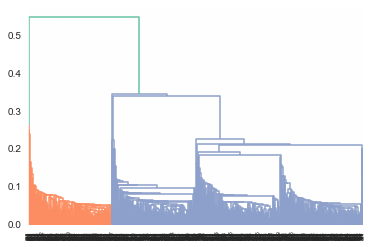

In [ ]:
mergings = linkage(dataset_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

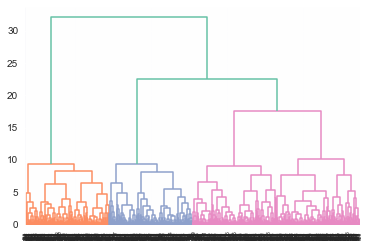

In [ ]:
mergings = linkage(dataset, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

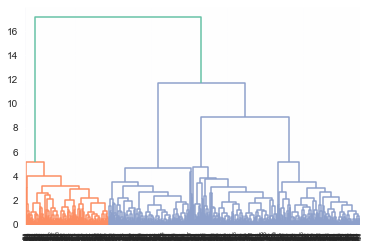

In [ ]:
mergings = linkage(dataset, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 0, 2, 3, 1, 1, 3, 1, 1, 0, 3, 2, 0, 3, 2, 2, 0, 1, 3, 1, 0,
       3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 0, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2,
       0, 1, 1, 0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 1, 0, 0, 3, 3, 2, 2, 2, 0,
       1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 3, 1, 1, 1, 2, 3, 1, 1, 1,
       2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 3, 2, 1, 3, 1, 2, 1, 0, 2, 3,
       1, 1, 2, 0, 2, 2, 1, 2, 3, 3, 3, 0, 2, 2, 1, 3, 1, 0, 2, 3, 3, 1,
       2, 1, 1, 1, 2, 1, 3, 0, 3, 0, 3, 1, 0, 0, 3, 1, 0, 0, 3, 1, 1, 1,
       2, 1, 1, 1, 3, 2, 0, 3, 1, 1, 1, 1, 0, 0, 1, 3, 2, 3, 3, 3, 2, 3,
       2, 3, 3, 1, 2, 1, 2, 1, 1, 2, 3, 2, 3, 0, 2, 1, 3, 3, 2, 0, 2, 0,
       2, 2, 2, 1, 0, 0, 3, 3, 2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 1, 3, 3, 0,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 3, 2, 3, 3, 2, 1, 2,
       3, 3, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 3, 2, 1, 0, 1, 3, 0, 1, 3,
       0, 2, 1, 2, 0, 3, 3, 1, 3, 2, 0, 0, 2, 0, 2, 1, 3, 0, 2, 1, 2, 2,
       2, 1, 1, 0, 3, 2, 1, 0, 0, 3, 0, 3, 1, 0, 3,

In [ ]:
dataset['h_clusters'] = cluster_labels
dataset.head()

,height,weight,km_clusters,h_clusters
0,174.239573,203.552173,0,0
1,182.113367,192.210443,1,1
2,173.547440,204.673334,0,0
3,173.222420,187.045260,3,2
4,186.628395,183.353584,2,3


Text(0.5, 0.98, 'Cluster Analysis')

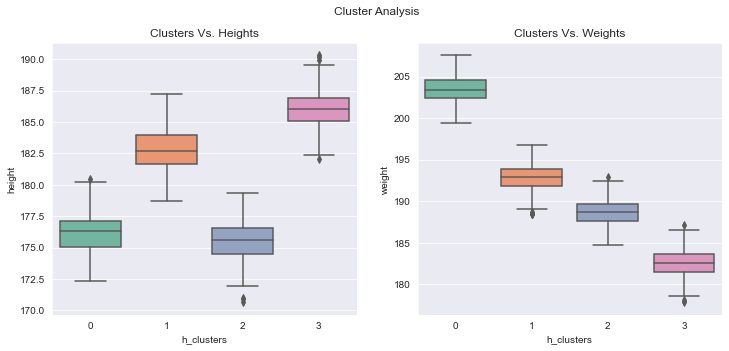

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='h_clusters', y='height', data=dataset)
plt.title('Clusters Vs. Heights')

plt.subplot(1, 2, 2)
sns.boxplot(x='h_clusters', y='weight', data=dataset)
plt.title('Clusters Vs. Weights')

plt.suptitle('Cluster Analysis')

<AxesSubplot:title={'center':'Hierarchical Clustering Visualization'}, xlabel='height', ylabel='weight'>

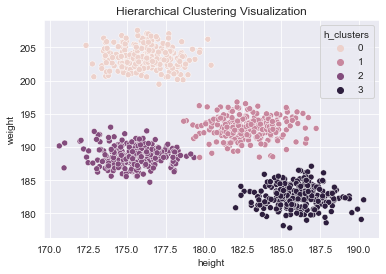

In [ ]:
plt.title('Hierarchical Clustering Visualization')
sns.scatterplot(x="height", y="weight", hue="h_clusters", data=dataset)

Text(0.5, 0.98, 'Hierarchical Clusters Vs. K-means Clusters')

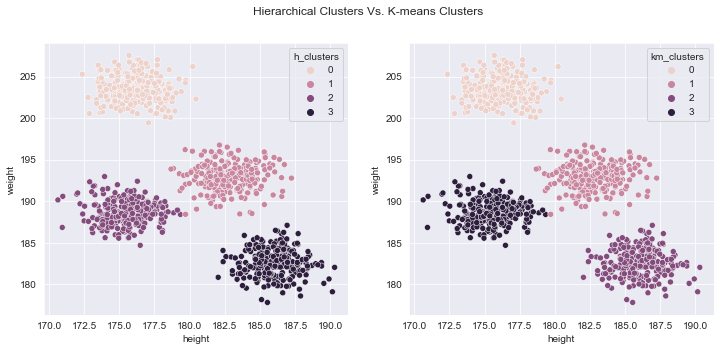

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x="height", y="weight", hue="h_clusters", data=dataset)

plt.subplot(1, 2, 2)
sns.scatterplot(x="height", y="weight", hue="km_clusters", data=dataset)

plt.suptitle('Hierarchical Clusters Vs. K-means Clusters')

<div class="alert alert-block alert-success">
    <h2 style="text-align: left">K-Means Clustering on 3-Dimensional Data</h2>
</div>

In [ ]:
cus_df = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')

In [ ]:
cus_df.head()

,Age,Annual_Income,Spending_Score
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


In [ ]:
cus_df.shape

(200, 3)

<AxesSubplot:title={'center':'Spending_Score Vs. Annual Income'}, xlabel='Spending_Score', ylabel='Annual_Income'>

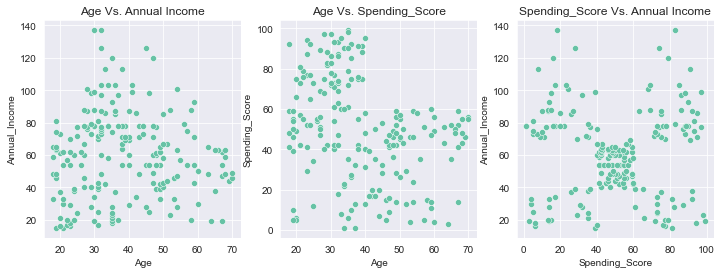

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Age Vs. Annual Income")
sns.scatterplot(x="Age", y="Annual_Income", data=cus_df)

plt.subplot(1, 3, 2)
plt.title("Age Vs. Spending_Score")
sns.scatterplot(x="Age", y="Spending_Score", data=cus_df)

plt.subplot(1, 3, 3)
plt.title("Spending_Score Vs. Annual Income")
sns.scatterplot(x="Spending_Score", y="Annual_Income", data=cus_df)

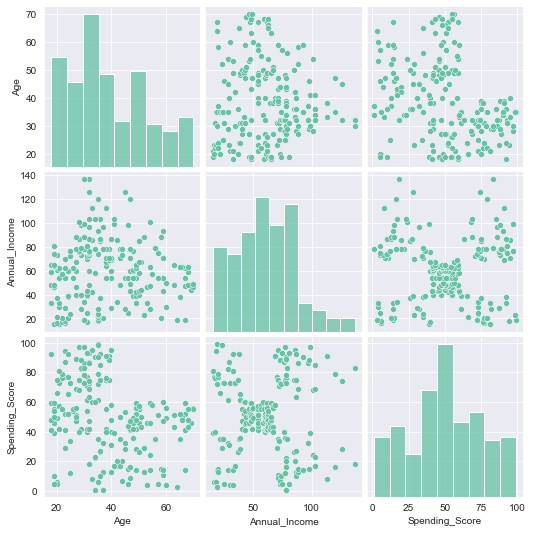

In [ ]:
sns.pairplot(cus_df)

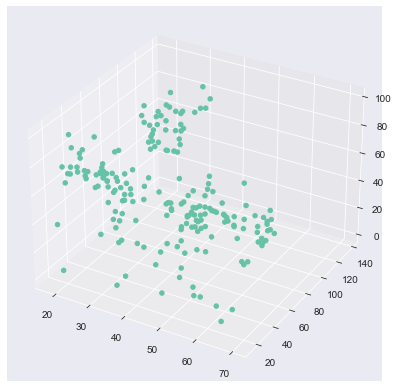

In [ ]:
plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cus_df.iloc[:, 0], cus_df.iloc[:, 1], cus_df.iloc[:, 2], alpha=1)
plt.show()

In [ ]:
scaler = StandardScaler()

dataset_scaled = scaler.fit_transform(cus_df)
dataset_scaled.shape

(200, 3)

In [ ]:
variations = []
range_n_clusters = range(2,15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    
    variations.append(kmeans.inertia_)

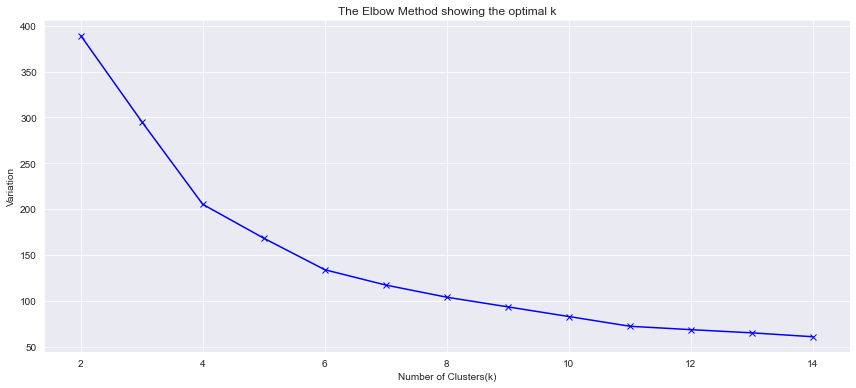

In [ ]:
plt.plot(range_n_clusters, variations, 'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Variation')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(dataset_scaled)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
cus_df['km_clusters'] = kmeans.labels_

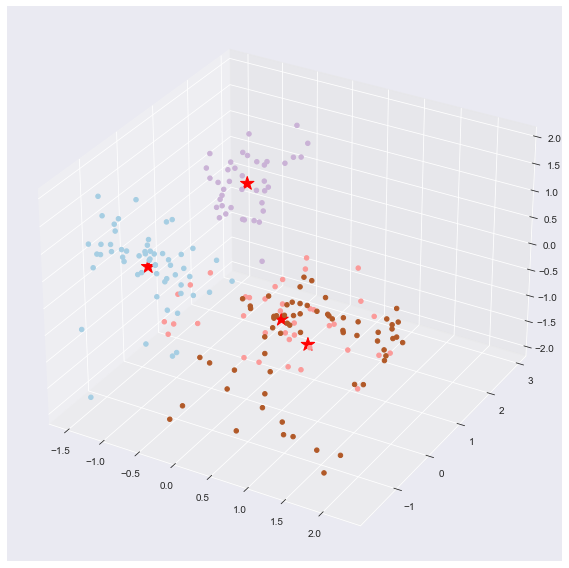

In [ ]:
plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], dataset_scaled[:, 2], c=kmeans.labels_, alpha=1, cmap='Paired')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, alpha=1)
plt.show()

<div class="alert alert-block alert-success">
    <h2 style="text-align: left">Hierarchical Clustering on 3-Dimensional Data</h2>
</div>

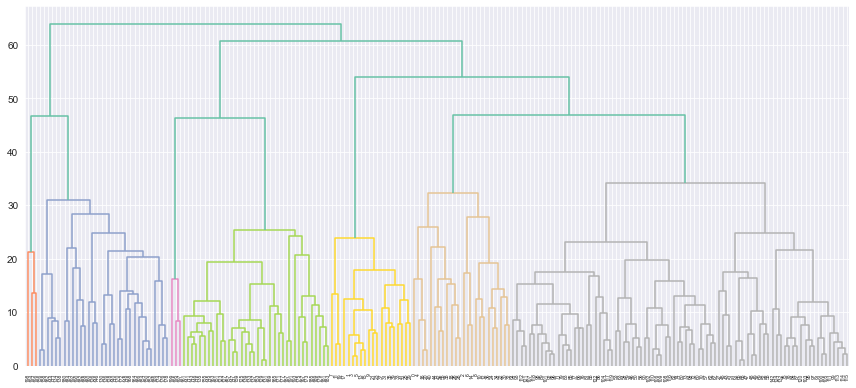

In [ ]:
mergings = linkage(cus_df, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [ ]:
cus_df['h_clusters'] = cluster_labels
cus_df.head()

,Age,Annual_Income,Spending_Score,km_clusters,h_clusters
CustomerID,,,,,
1,19,15,39,0,0
2,21,15,81,0,1
3,20,16,6,0,0
4,23,16,77,0,1
5,31,17,40,0,0


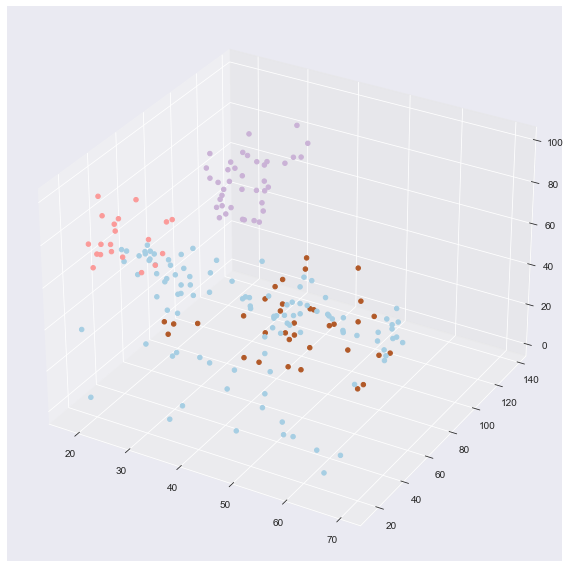

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cus_df.iloc[:, 0], cus_df.iloc[:, 1], cus_df.iloc[:, 2], c=cus_df['h_clusters'], alpha=1, cmap='Paired')
plt.show()